In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


SSD-300 Training Curves
===

This notebook plots the training curves of SSD-300 with different loss scaling methods.

In [2]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import spline
import seaborn as sns

In [3]:
matplotlib.rcParams.update({'font.size': 16})

In [4]:
# helping functions

def load_train_log(train_dir):
    """ Load train log from the directory """
    return pd.read_json(os.path.join(train_dir, 'log'))

def plot_train_log(train_dir, label, ax, sample_freq=100):
    """ Plot a single train log on a give ax """
    log = load_train_log(train_dir)

    print(train_dir)
    if 'validation/main/map' in log:
        print('Best mAP={:.4f}'.format(log['validation/main/map'].max()))
    
    x = log['iteration'].values[::sample_freq]
    y = log['main/loss'].values[::sample_freq]
    
    ax.plot(x, y, label='{}'.format(label))

## Batch size is 8

In [13]:
DIRS = {
    'GS': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/ada_loss.GPU_1_F_100_AB_65504_SB_65504.20200102',
    'Dyn-LS': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/dyn_loss.GPU_1_dyn_10.20200102',
    'Fixed-LS (8)': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/fixed.GPU_1_scale_8.20200102',
    # 'fixed_128': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/fixed.GPU_1_scale_128.20200102',
    # 'Fixed-LS (1024)': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/fixed.GPU_1_scale_1024.20200103',
}

/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/ada_loss.GPU_1_F_100_AB_65504_SB_65504.20200102
Best mAP=0.7635
/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/dyn_loss.GPU_1_dyn_10.20200102
Best mAP=0.6926
/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/fixed.GPU_1_scale_8.20200102
Best mAP=0.7603


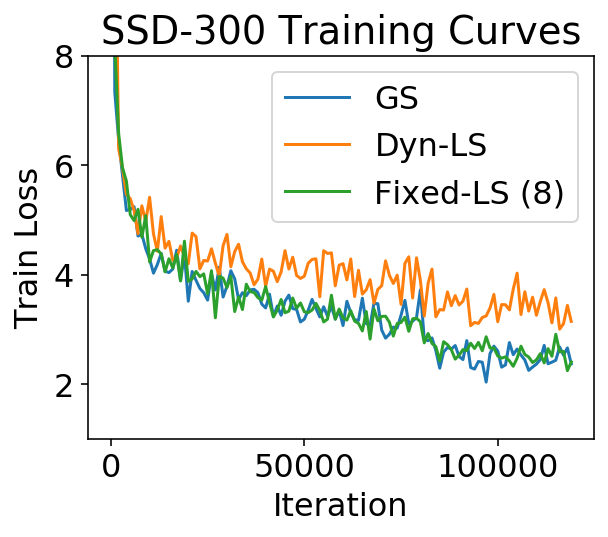

In [18]:
fig, ax = plt.subplots(figsize=(4.5, 4))

for label, train_dir in DIRS.items():  
    plot_train_log(train_dir, label, ax, sample_freq=100)

ax.legend()
ax.set_xlabel('Iteration')
ax.set_ylabel('Train Loss')
ax.set_ylim([1, 8])
ax.set_title('SSD-300 Training Curves')

fig.tight_layout()
fig.savefig('SSD-300_curve.pdf')